In [ ]:
# Install MNE library (if not already installed)
!pip install mne

In [ ]:
# Import necessary libraries
import numpy as np
import scipy.io
import mne
import matplotlib.pyplot as plt

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Subject_A_Test = '/content/drive/MyDrive/Colab Notebooks/Winter_Projects 25-26/EEG_Speller/BCI_Comp_III_Wads_2004/Subject_A_Test.mat'
# Subject_A_Train = '/content/drive/MyDrive/Colab Notebooks/Winter_Projects 25-26/EEG_Speller/BCI_Comp_III_Wads_2004/Subject_A_Train.mat'
# Subject_B_Test = '/content/drive/MyDrive/Colab Notebooks/Winter_Projects 25-26/EEG_Speller/BCI_Comp_III_Wads_2004/Subject_B_Test.mat'
# Subject_B_Train = '/content/drive/MyDrive/Colab Notebooks/Winter_Projects 25-26/EEG_Speller/BCI_Comp_III_Wads_2004/Subject_B_Train.mat'

# A_Test_mat = scipy.io.loadmat(Subject_A_Test)
# A_Train_mat = scipy.io.loadmat(Subject_A_Train)
# B_Train_mat = scipy.io.loadmat(Subject_B_Test)
# B_Train_mat = scipy.io.loadmat(Subject_B_Train)




# 2. Load the Data
file_path = '/content/drive/MyDrive/Colab Notebooks/Winter_Projects 25-26/EEG_Speller/BCI_Comp_III_Wads_2004/Subject_A_Train.mat'
mat_data = scipy.io.loadmat(file_path)


In [ ]:
# 3. Extract & Reshape EEG Signal
print(f"class of mat_data = {type(mat_data)}")
print(f"All keys in mat_data dict = {mat_data.keys()}")

signal = mat_data['Signal']              # (epochs, samples, channels)
print(f"shape of signal = {signal.shape}")

signal = np.concatenate(signal, axis=0) # (epochs*samples, channels)
print(f"signal shape after concatenation = {signal.shape}")

signal = signal.T                        # Transpose
signal = signal * 1e-6                   # Micro Volt to Volt
print(f"Final shape of signal: {signal.shape}")

class of mat_data = <class 'dict'>
All keys in mat_data dict = dict_keys(['__header__', '__version__', '__globals__', 'Signal', 'TargetChar', 'Flashing', 'StimulusCode', 'StimulusType'])
shape of signal = (85, 7794, 64)
signal shape after concatenation = (662490, 64)
Final shape of signal: (64, 662490)


In [ ]:

# 4. Process Marker Channels (e.g., Flashing & StimulusCode)
flashing = mat_data['Flashing'].flatten()
stimulus = mat_data['StimulusCode'].flatten()

print(flashing.shape)
print(stimulus.shape)

# Ensure the lengths of the processed signal and markers are consistent.
print(f"length of signal and flashing marker is same: {flashing.shape[0] == signal.shape[1]}")
print(f"length of signal and StimulusCode marker is same: {stimulus.shape[0] == signal.shape[1]}")


(662490,)
(662490,)
length of signal and flashing marker is same: True
length of signal and StimulusCode marker is same: True


In [ ]:
# plt.figure(figsize=(12, 4))
# plt.plot(signal[0, :2000])
# plt.title("Raw EEG – Channel 0 (First 2000 Samples)")
# plt.xlabel("Samples")
# plt.ylabel("Voltage (V)")
# plt.grid(True)
# plt.show()


In [ ]:
# 5. Construct MNE Events

onsets = np.where(np.diff(flashing) == 1)[0] + 1    #indices rising edge of the flashing

events = np.array([
    [idx, 0, stimulus[idx]] for idx in onsets
])

print("\nMNE Events array shape:", events.shape)
print("First 5 events:\n", events[:5])




MNE Events array shape: (15299, 3)
First 5 events:
 [[ 42.   0.  11.]
 [ 84.   0.   3.]
 [126.   0.  10.]
 [168.   0.   9.]
 [210.   0.   7.]]


In [ ]:
# 6. Create MNE Raw Object

sfreq = 240   # as mentioned in the documentation, that sampling frequency was digitized at 240Hz
print("Sampling frequency:", sfreq, "Hz")

n_channels = signal.shape[0]
ch_names = [f'EEG{i}' for i in range(n_channels)]
print("Number of channels:", n_channels)

ch_types = ['eeg'] * n_channels

info = mne.create_info(
    ch_names=ch_names,
    sfreq=sfreq,
    ch_types=ch_types
)
print()
print(info)

raw = mne.io.RawArray(signal, info)
print("\n\n")
print(raw)




Sampling frequency: 240 Hz
Number of channels: 64

<Info | 7 non-empty values
 bads: []
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4, EEG5, EEG6, EEG7, EEG8, EEG9, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 120.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 240.0 Hz
>
Creating RawArray with float64 data, n_channels=64, n_times=662490
    Range : 0 ... 662489 =      0.000 ...  2760.371 secs
Ready.



<RawArray | 64 x 662490 (2760.4 s), ~323.5 MiB, data loaded>


In [ ]:
stim_data = np.zeros((1, signal.shape[1]))

stim_data[0, onsets] = stimulus[onsets]

stim_info = mne.create_info(
    ch_names=['STI'],
    sfreq=sfreq,
    ch_types=['stim']
)

stim_raw = mne.io.RawArray(stim_data, stim_info)
raw.add_channels([stim_raw])



Creating RawArray with float64 data, n_channels=1, n_times=662490
    Range : 0 ... 662489 =      0.000 ...  2760.371 secs
Ready.


<RawArray | 65 x 662490 (2760.4 s), ~328.6 MiB, data loaded>

In [ ]:



# 1. Mount Google Drive
# Mount Google Drive to access the dataset.
# (Example: drive.mount('/content/drive'))

# 2. Load the Data
# Load the '.mat' file using scipy.io.loadmat.
# (Example: file_path = '/content/drive/My Drive/eea/Dataset/Subject_A_Train.mat'; mat_data = scipy.io.loadmat(file_path))

# 3. Extract & Reshape EEG Signal
# The raw signal is typically 3D (Epochs, Samples, Channels).
# Reshape it into 2D (Channels, Total_Samples) for MNE.
# This involves concatenating epochs and transposing the data.
# Convert the units from microvolts (uV) to Volts (V).

# 4. Process Marker Channels (e.g., Flashing & StimulusCode)
# These markers are usually 3D or 2D and need to be flattened to 1D to match the continuous signal length.
# Ensure the lengths of the processed signal and markers are consistent.

# 5. Construct MNE Events
# Using the processed marker channels (e.g., 'Flashing' for onset detection and 'StimulusCode' for event IDs),
# detect event onsets (e.g., rising edges of the 'Flashing' signal).
# Then, create an MNE-compatible events array: (onset_index, 0, event_id).

# 6. Create MNE Raw Object
# Define the sampling frequency (sfreq), channel names (ch_names), and channel types (ch_types).
# Then, create an MNE 'info' object.
# Finally, create an 'mne.io.RawArray' object from the reshaped EEG signal and the 'info' object.
# Optionally, add the events as a 'stim' channel to the raw object.

Effective window size : 8.533 (s)
Plotting power spectral density (dB=True).


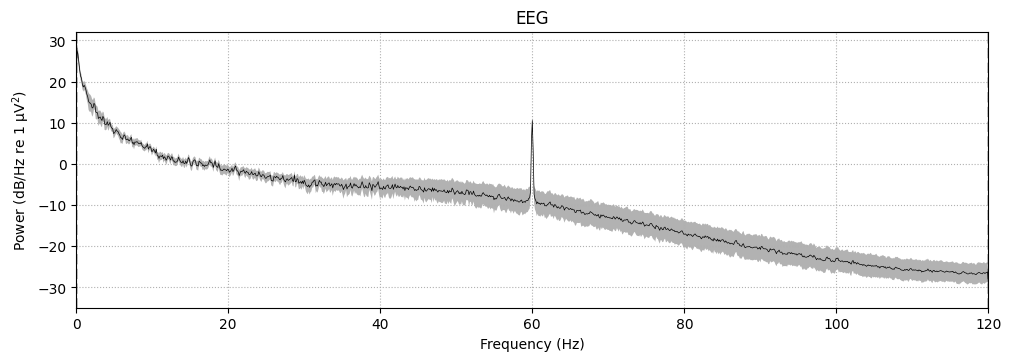

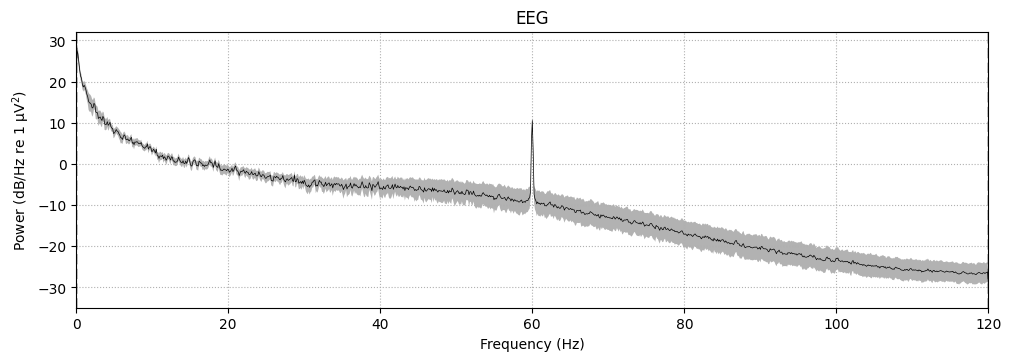

In [ ]:
# 1. Visualize Data BEFORE Filtering (Power Spectral Density)
psd_before = raw.compute_psd(
    fmin=0,
    fmax=120,
    method='welch'
)

psd_before.plot(
    average=True,
    picks='eeg',
    exclude='bads'
)


In [ ]:

# 2. Apply Band-pass Filter
print("Applying band-pass filter (0.1–20 Hz)...")

raw_filt = raw.copy().filter(
    l_freq=0.1,
    h_freq=20,
    fir_design='firwin',
    picks='eeg'
)

print("Filtering done.")


Applying band-pass filter (0.1–20 Hz)...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 7921 samples (33.004 s)

Filtering done.


In [ ]:

# 3. Downsample the Data
print("Original sampling rate:", raw_filt.info['sfreq'], "Hz")

raw_rs = raw_filt.copy().resample(
    sfreq=120
)

print("New sampling rate:", raw_rs.info['sfreq'], "Hz")


Original sampling rate: 240.0 Hz
Finding events on: STI
15299 events found on stim channel STI
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Finding events on: STI
15299 events found on stim channel STI
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12]
New sampling rate: 120.0 Hz


Computing PSD AFTER filtering + resampling...
Effective window size : 17.067 (s)
Plotting power spectral density (dB=True).


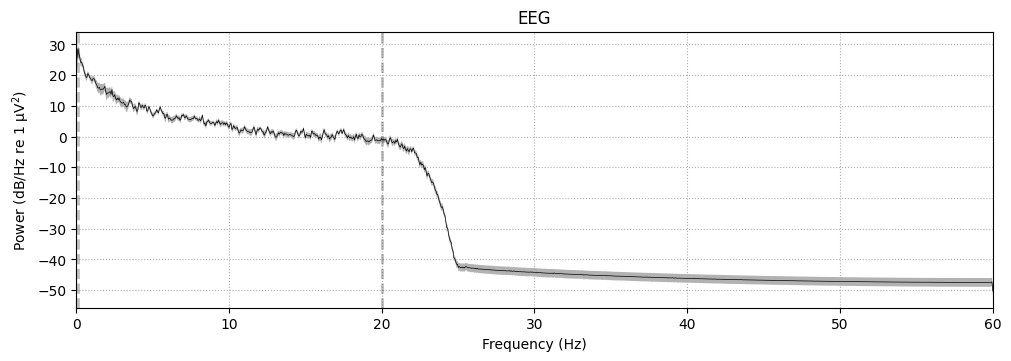

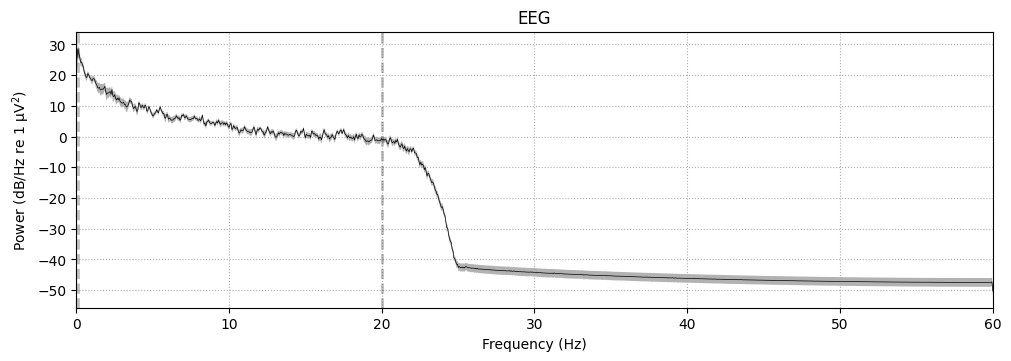

In [ ]:

# 4. Visualize Data AFTER Filtering
print("Computing PSD AFTER filtering + resampling...")

psd_rs = raw_rs.compute_psd(
    fmin=0,
    fmax=60,
    method='welch'
)

psd_rs.plot(
    average=True,
    picks='eeg'
)


In [ ]:
## https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html#

# 1. Visualize Data BEFORE Filtering (Power Spectral Density)
# Compute and plot the Power Spectral Density (PSD) of the raw data
# to observe the frequency content before any filtering (e.g., raw.compute_psd().plot()).

# 2. Apply Band-pass Filter
# Apply a band-pass filter to the raw data (e.g., 0.1Hz - 20Hz) to remove unwanted frequencies.
# Consider using an FIR filter design (e.g., raw.filter(l_freq=..., h_freq=..., fir_design='firwin')).

# 3. Downsample the Data
# Downsample the data to a lower sampling rate (e.g., from 240Hz to 120Hz).
# MNE's resample function automatically handles anti-aliasing (e.g., raw.resample(sfreq=...)).

# 4. Visualize Data AFTER Filtering
# Compute and plot the PSD of the filtered and downsampled data
# to verify the effectiveness of the filtering (e.g., raw.compute_psd().plot()).



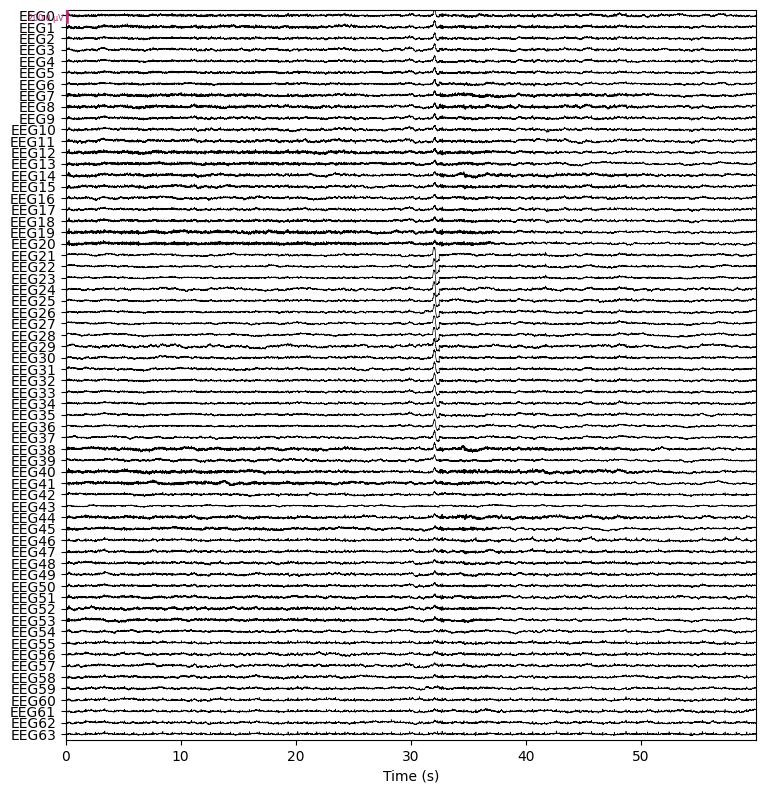

In [ ]:
fig = raw.plot(duration=60, proj=False, n_channels=64, scalings=dict(eeg=100e-6), show_scrollbars = False)

In [ ]:
montage_1020 = mne.channels.make_standard_montage("standard_1020")
standard_ch_names = montage_1020.ch_names

new_ch_names = standard_ch_names[:n_channels]
current_ch_names = raw.info['ch_names']

channel_mapping = dict(zip(current_ch_names, new_ch_names))
raw.rename_channels(channel_mapping)
raw.set_montage(montage_1020)

print("new channel names:", raw.info['ch_names'])

new channel names: ['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'STI']


In [ ]:

# 2. Initialize and Fit ICA


from mne.preprocessing import ICA

# Initialize ICA
ica = ICA(n_components = 15, max_iter="auto", random_state=97)

# fit ICA on high-pass filtered data
raw_for_ica = raw.copy().filter(l_freq=1., h_freq=None, fir_design='firwin', verbose=False)

# Fit ICA to the high-pass filtered raw data
ica.fit(raw_for_ica, reject=dict(eeg=100e-6))

print("ICA model fitted successfully.")
print(ica)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
    Rejecting  epoch based on EEG : ['F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4']
Artifact detected in [7200, 7680]
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AFz', 'AF2', 'AF4', 'AF8', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1']
Artifact detected in [7680, 8160]
    Rejecting  epoch based on EEG : ['F9']
Artifact detected in [8160, 8640]
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4',

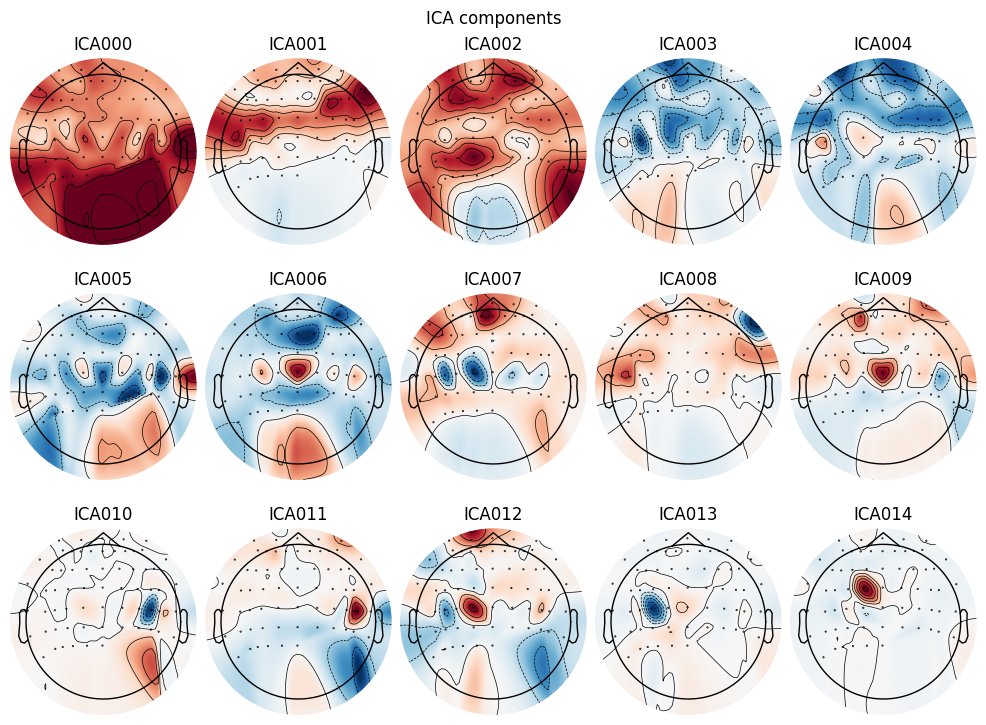

In [ ]:

# 3. Plot ICA Components
fig = ica.plot_components()

In [ ]:
# https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#
# 1. Assign Standard Channel Names and Montage
# The initial channel names might be generic (e.g., EEG_1, EEG_2).
# Rename the EEG channels to standard names (e.g., 'FC5', 'Cz', 'Pz')
# that correspond to a known montage (e.g., 'standard_1005' or 'standard_1020').
# This is crucial for visualizing components topologically.
# Then, set a standard montage using mne.channels.make_standard_montage.

# 2. Initialize and Fit ICA
# Initialize an ICA object (e.g., mne.preprocessing.ICA) specifying parameters like n_components and random_state.
# Then, fit the ICA model to the raw data, often applying a high-pass filter (>1Hz) for better component separation.
# (Example: ica.fit(raw, reject=dict(eeg=...)))

# 3. Plot ICA Components
# After fitting, plot the ICA components to visually inspect them for artifacts like eye blinks or muscle activity.
# (Example: ica.plot_components())


Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Effective window size : 8.533 (s)
Effective window size : 8.533 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


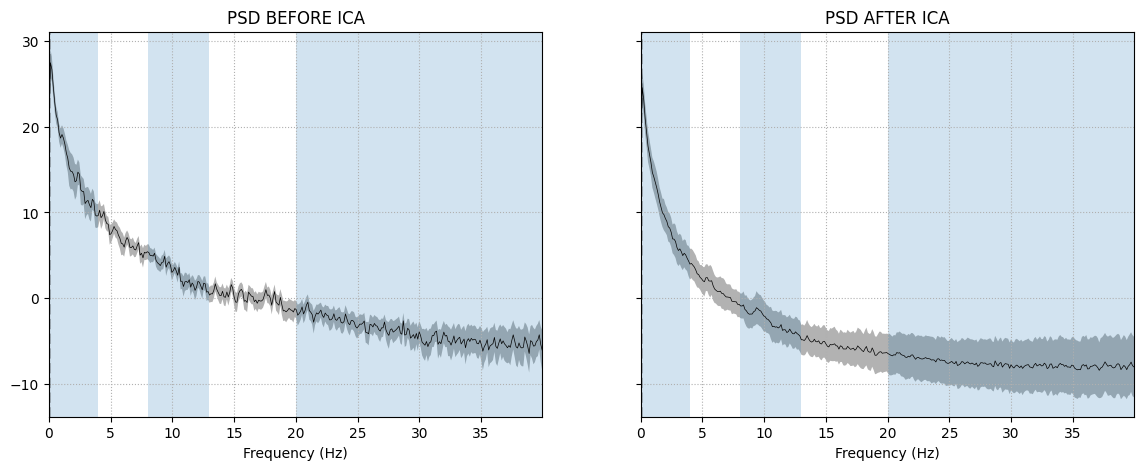

In [ ]:

# 1. Identify and Exclude Artifact Components
# Based on visual inspection of the ICA components (from the previous step),
# identify components that clearly represent artifacts (e.g., eye blinks, eye movements, muscle activity).
# Then, set the 'exclude' attribute of the ICA object with the indices of these artifact components.

# 2. Apply ICA to Remove Artifacts
# Apply the trained ICA model with the excluded components to the raw data.
# This will project the data back into sensor space with the identified artifact components removed.
# (Example: ica.apply(raw))

# 3. Visualize Clean Data
# To verify the artifact removal, plot a segment of the cleaned raw data.
# Observe if the previously identified artifacts (like large eye blinks) have been successfully suppressed.
# (Example: raw.plot(n_channels=..., duration=..., title='Data AFTER removing Blinks'))


import matplotlib.pyplot as plt

raw_before = raw.copy()
raw_after = raw.copy()

artifact_components = [0,1,2]     #it seems like disturbance is caused by these ICA components
ica.exclude = artifact_components


ica.apply(raw_after)

# compute PSDs
psd_before = raw_before.compute_psd(fmax=40, method="welch")
psd_after  = raw_after.compute_psd(fmax=40, method="welch")

# plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

psd_before.plot(
    axes=axes[0],
    average=True,
    show=False
)
axes[0].set_title("PSD BEFORE ICA")

psd_after.plot(
    axes=axes[1],
    average=True,
    show=False
)
axes[1].set_title("PSD AFTER ICA")

# mark frequency bands to compare accurately
for ax in axes:
    ax.axvspan(0, 4, alpha=0.2)     # eye blink
    ax.axvspan(8, 13, alpha=0.2)    # alpha
    ax.axvspan(20, 40, alpha=0.2)   # muscle
    ax.set_xlabel("Frequency (Hz)")

plt.show()


In [ ]:
# 1. Prepare Events for Epoching
# Load and process the 'StimulusType' data to assign labels (e.g., Target/Non-Target)
# to the event onsets identified earlier. Create a new MNE-compatible events array
# where the third column represents the event ID (e.g., 1 for Non-Target, 2 for Target).
# Ensure the event IDs are integers.

# Get StimulusType and flatten to 1D
stim_type = mat_data['StimulusType'].flatten()

# Build new events array:
# 1 = Non-Target, 2 = Target
events_p300 = np.array([
    [idx, 0, 2 if stim_type[idx] == 1 else 1]
    for idx in onsets
], dtype=int)

print("Events shape:", events_p300.shape)
print("first 5 events:\n", events_p300[:5])


Events shape: (15299, 3)
first 5 events:
 [[ 42   0   1]
 [ 84   0   1]
 [126   0   1]
 [168   0   1]
 [210   0   2]]


In [ ]:

# 2. Define Event IDs Dictionary
# Create a dictionary mapping descriptive event names (e.g., 'Non-Target', 'Target') to their corresponding integer IDs.

event_id = {
    'Non-Target': 1,
    'Target': 2
}

print("Event ID mapping:", event_id)



Event ID mapping: {'Non-Target': 1, 'Target': 2}


In [ ]:

# 3. Create Epochs
# Use mne.Epochs to segment the continuous raw data around the events.
# Define the epoch time window (e.g., tmin, tmax), set a baseline correction,
# and preload the data into memory.

epochs = mne.Epochs(
    raw_after,              # or raw_clean
    events_p300,
    event_id=event_id,
    tmin=-0.2,              # 200 ms BEFORE stimulus
    tmax=0.8,               # 800 ms AFTER stimulus
    baseline=(-0.2, 0),     # baseline correction
    preload=True
)


print(epochs)



Not setting metadata
15299 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15299 events and 241 original time points ...
1 bad epochs dropped
<Epochs | 15298 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~1.79 GiB, data loaded,
 'Non-Target': 12748
 'Target': 2550>


Evoked responses computed.
combining channels using "mean"
combining channels using "mean"


/tmp/ipython-input-1472373607.py:16: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


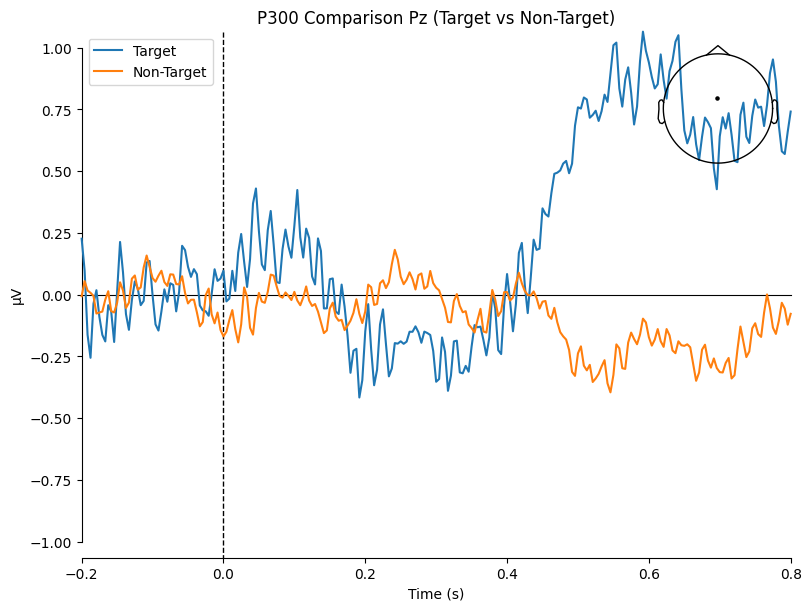

[<Figure size 800x600 with 2 Axes>]

In [ ]:


# 4. Compute Evoked Responses
# Compute the average evoked potentials for each event type (e.g., 'Target' and 'Non-Target')
# using the epochs object.

evoked_target = epochs['Target'].average()
evoked_nontarget = epochs['Non-Target'].average()

print("Evoked responses computed.")


# 5. Visualize the P300 Response
# Plot the averaged evoked responses, typically focusing on a central parietal electrode like 'Cz' or 'Pz',
# to look for the characteristic P300 component (a positive deflection around 300ms post-stimulus).
# (Example: mne.viz.plot_compare_evokeds for 'Target' vs 'Non-Target' at 'Cz')

mne.viz.plot_compare_evokeds(
    {
        'Target': evoked_target,
        'Non-Target': evoked_nontarget
    },
    picks='Cz',
    combine='mean',
    title='P300 Comparison Pz (Target vs Non-Target)'
)



combining channels using "mean"
combining channels using "mean"


/tmp/ipython-input-169348172.py:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


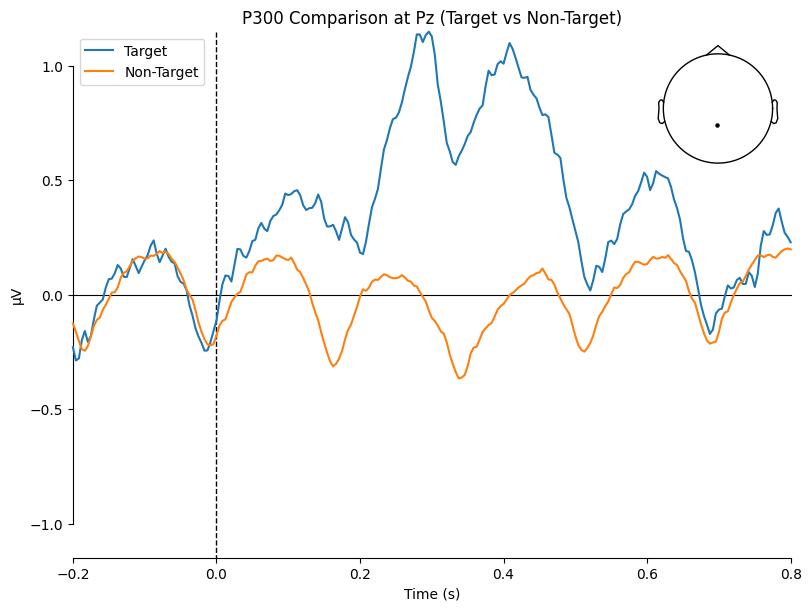

[<Figure size 800x600 with 2 Axes>]

In [ ]:

# 1. Compare Evokeds at Pz
# In addition to Cz, plot the evoked responses at channel 'Pz' (Parietal-central)
# as the P300 component is often prominently observed there.
# (Example: mne.viz.plot_compare_evokeds for 'Target' vs 'Non-Target' at 'Pz')

# Compare Target vs Non-Target evoked responses at Pz
mne.viz.plot_compare_evokeds(
    {
        'Target': evoked_target,
        'Non-Target': evoked_nontarget
    },
    picks='Pz',
    combine='mean',
    title='P300 Comparison at Pz (Target vs Non-Target)'
)
